# Machine Learning Python Chapter 3

In [34]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

## Import Iris dataset
-Extract petal length and petal width into X

In [35]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

## Split test and train datasets

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scale features to zero mean and unit variance

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Train Perceptron model

In [38]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=100, eta0=0.01, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      n_iter=100, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

## Prediction test

In [39]:
y_pred = ppn.predict(X_test_std)
ms = (y_test != y_pred).sum()
classification_error = ms / len(y_test)
print('Misclassified samples:', ms)
print('Classification accuracy:', (1-classification_error) * 100)

Misclassified samples: 2
Classification accuracy: 93.3333333333


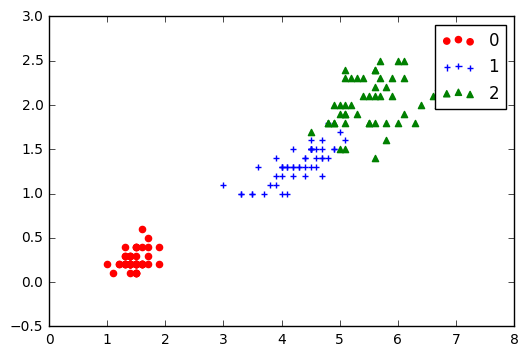

In [40]:
plt.scatter(X[np.where(y == 0), 0], X[np.where(y == 0), 1], marker='o', color='r', label='0')
plt.scatter(X[np.where(y == 1), 0], X[np.where(y == 1), 1], marker='+', color='b', label='1')
plt.scatter(X[np.where(y == 2), 0], X[np.where(y == 2), 1], marker='^', color='g', label='2')
plt.legend()
plt.show()



## Decision region plot function

In [41]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), \
                          np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    # highlight test samples
    
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

## Plot decision regions

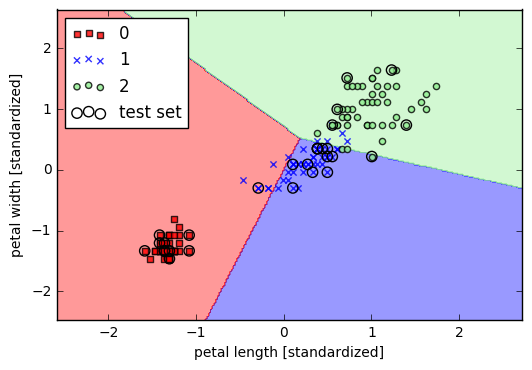

In [42]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, \
                     y=y_combined, \
                     classifier=ppn, \
                     test_idx=range(len(X_train_std), len(X_combined_std)-1))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Use a logistic regression model on the same classification problem

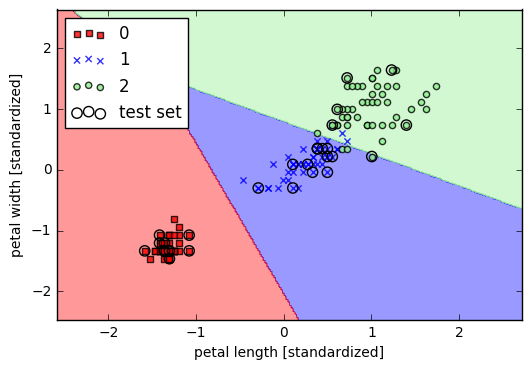

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, \
                      y_combined, \
                      classifier=lr, \
                      test_idx=range(len(X_train_std), len(X_combined_std)-1))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Logistic regression accuracy

In [48]:
y_pred = lr.predict(X_test_std)
ms = (y_test != y_pred).sum()
classification_error = ms / len(y_test)
print('Misclassified samples:', ms)
print('Classification accuracy:', (1-classification_error) * 100)

Misclassified samples: 1
Classification accuracy: 96.6666666667


## Test different values of regularization

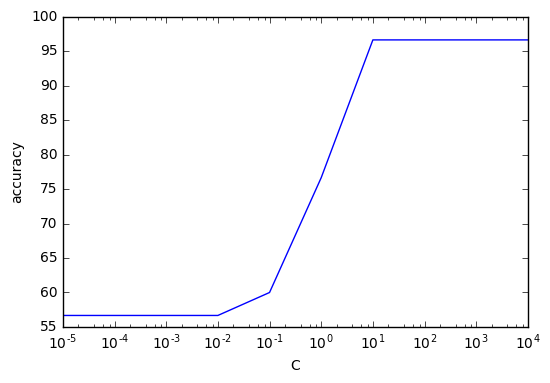

In [59]:
accuracy = []
C_ = []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    y_pred = lr.predict(X_test_std)
    ms = (y_test != y_pred).sum()
    accuracy.append((1-(ms / len(y_test))) * 100)
    C_.append(10**c)

accuracy = np.array(accuracy)
C_ = np.array(C_)

plt.plot(C_, accuracy)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.xscale('log')
plt.show()

## Switching gears to address non-linear SVM kernels

### Generate dataset

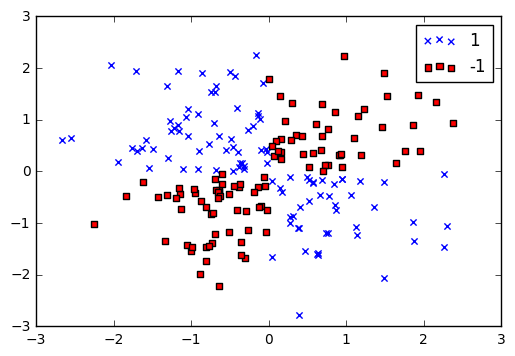

In [60]:
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

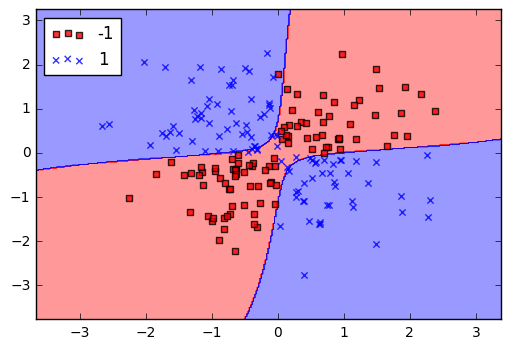

In [61]:
from sklearn.svm import SVC
# the 'rbf' kernel is a non-linear SVM kernel
# the parameter 'gamma' defines how strongly the samples influence the fit.  A larger gamma creates a 'hard'
# decision boundary, a small gamma creates a 'soft' decision boundary.
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

The chapter delves into decision trees and random forest classifiers.  Skipping them here and moving on.

## Switching gears to K-nearest neighbors

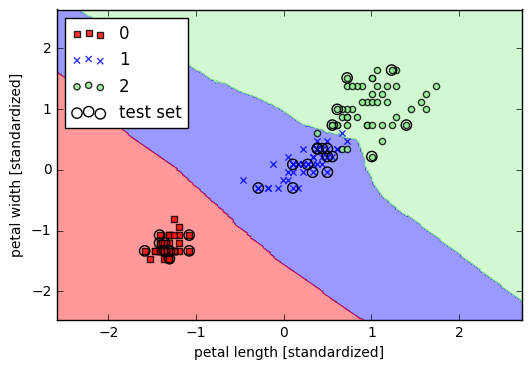

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski') #, weights='distance')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, \
                      test_idx=range(len(X_train_std), len(X_combined_std)-1))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()